## Predicting Housing Prices using Cross Validation in Regression Models

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

## Importing the Dataset


In [2]:
data = pd.read_csv('Melbourne_housing_FULL.csv')
df = data.copy()

In [3]:
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


In [4]:
df.tail()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
34852,Yarraville,13 Burns St,4,h,1480000.0,PI,Jas,24/02/2018,6.3,3013.0,...,1.0,3.0,593.0,NaN,NaN,Maribyrnong City Council,-37.81053,144.88467,Western Metropolitan,6543.0
34853,Yarraville,29A Murray St,2,h,888000.0,SP,Sweeney,24/02/2018,6.3,3013.0,...,2.0,1.0,98.0,104.0,2018.0,Maribyrnong City Council,-37.81551,144.88826,Western Metropolitan,6543.0
34854,Yarraville,147A Severn St,2,t,705000.0,S,Jas,24/02/2018,6.3,3013.0,...,1.0,2.0,220.0,120.0,2000.0,Maribyrnong City Council,-37.82286,144.87856,Western Metropolitan,6543.0
34855,Yarraville,12/37 Stephen St,3,h,1140000.0,SP,hockingstuart,24/02/2018,6.3,3013.0,...,NaN,NaN,NaN,NaN,NaN,Maribyrnong City Council,NaN,NaN,Western Metropolitan,6543.0
34856,Yarraville,3 Tarrengower St,2,h,1020000.0,PI,RW,24/02/2018,6.3,3013.0,...,1.0,0.0,250.0,103.0,1930.0,Maribyrnong City Council,-37.81810,144.89351,Western Metropolitan,6543.0


This is a house prices dataset for Melbourne, Australia. The main objective of this analysis is on prediction. 

Checking Target Variable Distribution: Since this is a regression task, typically having a continuous target variable. I visualized its distribution to understand its balance.

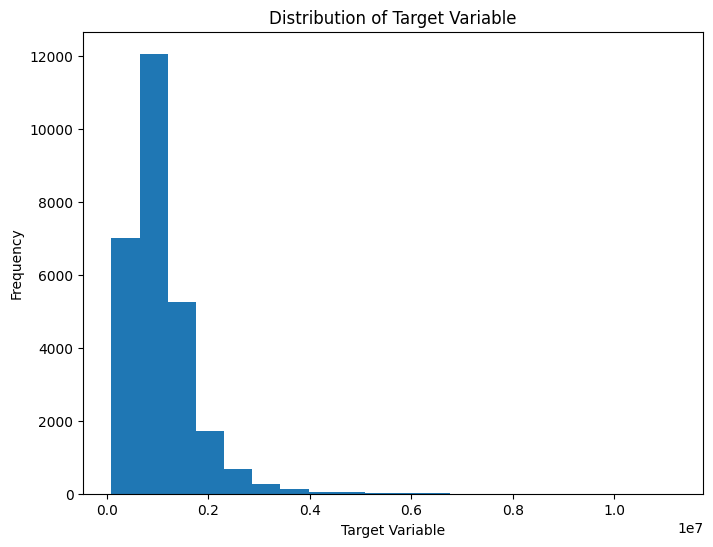

In [5]:
plt.figure(figsize=(8, 6))
plt.hist(df['Price'], bins=20)
plt.title('Distribution of Target Variable')
plt.xlabel('Target Variable')
plt.ylabel('Frequency')
plt.show()


In [6]:
df.dtypes

Suburb            object
Address           object
Rooms              int64
Type              object
Price            float64
Method            object
SellerG           object
Date              object
Distance         float64
Postcode         float64
Bedroom2         float64
Bathroom         float64
Car              float64
Landsize         float64
BuildingArea     float64
YearBuilt        float64
CouncilArea       object
Lattitude        float64
Longtitude       float64
Regionname        object
Propertycount    float64
dtype: object

In [7]:
#it gives the number of rows and columns in data
df.shape

(34857, 21)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         34857 non-null  object 
 1   Address        34857 non-null  object 
 2   Rooms          34857 non-null  int64  
 3   Type           34857 non-null  object 
 4   Price          27247 non-null  float64
 5   Method         34857 non-null  object 
 6   SellerG        34857 non-null  object 
 7   Date           34857 non-null  object 
 8   Distance       34856 non-null  float64
 9   Postcode       34856 non-null  float64
 10  Bedroom2       26640 non-null  float64
 11  Bathroom       26631 non-null  float64
 12  Car            26129 non-null  float64
 13  Landsize       23047 non-null  float64
 14  BuildingArea   13742 non-null  float64
 15  YearBuilt      15551 non-null  float64
 16  CouncilArea    34854 non-null  object 
 17  Lattitude      26881 non-null  float64
 18  Longti

<Axes: xlabel='Price', ylabel='count'>

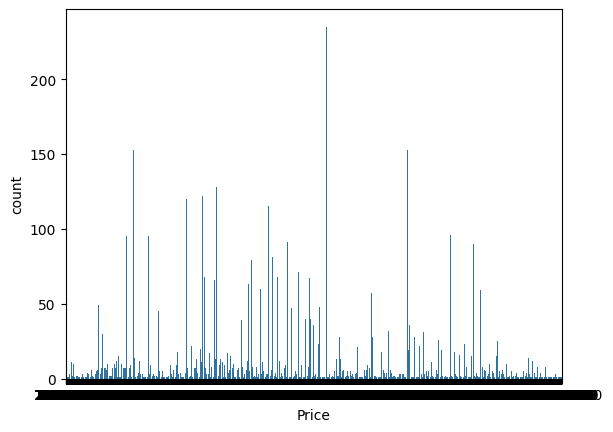

In [9]:
# distribution of numeric variables
sns.countplot(x = df['Price'])

<Axes: xlabel='Rooms', ylabel='count'>

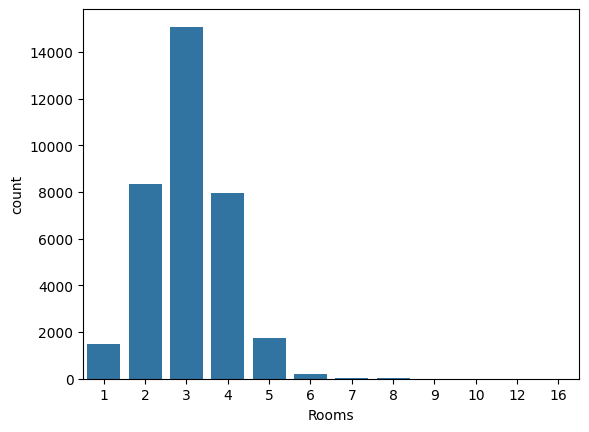

In [10]:
sns.countplot(x = df['Rooms'])

In [11]:
object_to_category = df.select_dtypes(include=['object']).columns # to selects columns with data type 'object'

In [12]:
df[object_to_category] = df[object_to_category].astype('category')

In [13]:
df.info() #checking informations

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Suburb         34857 non-null  category
 1   Address        34857 non-null  category
 2   Rooms          34857 non-null  int64   
 3   Type           34857 non-null  category
 4   Price          27247 non-null  float64 
 5   Method         34857 non-null  category
 6   SellerG        34857 non-null  category
 7   Date           34857 non-null  category
 8   Distance       34856 non-null  float64 
 9   Postcode       34856 non-null  float64 
 10  Bedroom2       26640 non-null  float64 
 11  Bathroom       26631 non-null  float64 
 12  Car            26129 non-null  float64 
 13  Landsize       23047 non-null  float64 
 14  BuildingArea   13742 non-null  float64 
 15  YearBuilt      15551 non-null  float64 
 16  CouncilArea    34854 non-null  category
 17  Lattitude      26881 non-null  

In [14]:
df.describe().T #i am describing the data by tranposing

,count,mean,std,min,25%,50%,75%,max
Rooms,34857.0,3.031012e+00,0.969933,1.00000,2.00000,3.0000,4.000000e+00,1.600000e+01
Price,27247.0,1.050173e+06,641467.130105,85000.00000,635000.00000,870000.0000,1.295000e+06,1.120000e+07
Distance,34856.0,1.118493e+01,6.788892,0.00000,6.40000,10.3000,1.400000e+01,4.810000e+01
Postcode,34856.0,3.116063e+03,109.023903,3000.00000,3051.00000,3103.0000,3.156000e+03,3.978000e+03
Bedroom2,26640.0,3.084647e+00,0.980690,0.00000,2.00000,3.0000,4.000000e+00,3.000000e+01
Bathroom,26631.0,1.624798e+00,0.724212,0.00000,1.00000,2.0000,2.000000e+00,1.200000e+01
Car,26129.0,1.728845e+00,1.010771,0.00000,1.00000,2.0000,2.000000e+00,2.600000e+01
Landsize,23047.0,5.935990e+02,3398.841946,0.00000,224.00000,521.0000,6.700000e+02,4.330140e+05
BuildingArea,13742.0,1.602564e+02,401.267060,0.00000,102.00000,136.0000,1.880000e+02,4.451500e+04
YearBuilt,15551.0,1.965290e+03,37.328178,1196.00000,1940.00000,1970.0000,2.000000e+03,2.106000e+03


In [15]:
df.corr(numeric_only=True).T  #Computes the correlation matrix using only numeric columns in the DataFrame

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
Rooms,1.000000,0.465238,0.271511,0.085890,0.946755,0.611826,0.393878,0.037402,0.156229,-0.012749,0.004872,0.103235,-0.071677
Price,0.465238,1.000000,-0.211384,0.044950,0.430275,0.429878,0.201803,0.032748,0.100754,-0.333306,-0.215607,0.197874,-0.059017
Distance,0.271511,-0.211384,1.000000,0.481566,0.269524,0.126201,0.241835,0.060862,0.076301,0.323059,-0.100417,0.200946,-0.018140
Postcode,0.085890,0.044950,0.481566,1.000000,0.089292,0.120080,0.067886,0.040664,0.042437,0.089805,-0.231027,0.362895,0.017108
Bedroom2,0.946755,0.430275,0.269524,0.089292,1.000000,0.614892,0.388491,0.037019,0.154157,-0.002022,0.003447,0.106164,-0.053451
Bathroom,0.611826,0.429878,0.126201,0.120080,0.614892,1.000000,0.307518,0.036333,0.147558,0.167955,-0.059183,0.106531,-0.032887
Car,0.393878,0.201803,0.241835,0.067886,0.388491,0.307518,1.000000,0.037829,0.104373,0.128702,-0.009020,0.047213,-0.009617
Landsize,0.037402,0.032748,0.060862,0.040664,0.037019,0.036333,0.037829,1.000000,0.354530,0.044474,0.025318,-0.002582,-0.018195
BuildingArea,0.156229,0.100754,0.076301,0.042437,0.154157,0.147558,0.104373,0.354530,1.000000,0.067811,0.017155,-0.002143,-0.024523
YearBuilt,-0.012749,-0.333306,0.323059,0.089805,-0.002022,0.167955,0.128702,0.044474,0.067811,1.000000,0.091592,-0.022175,0.022420


In [16]:
df.corrwith(other=df["Price"], numeric_only=True)  #the correlation between the "Price" column and all other numeric columns

Rooms            0.465238
Price            1.000000
Distance        -0.211384
Postcode         0.044950
Bedroom2         0.430275
Bathroom         0.429878
Car              0.201803
Landsize         0.032748
BuildingArea     0.100754
YearBuilt       -0.333306
Lattitude       -0.215607
Longtitude       0.197874
Propertycount   -0.059017
dtype: float64

By examining the correlation coefficients, we can identify which features have the strongest (positive or negative) relationship with our "Price" column. It is valuable for tasks for understanding the dataset, and building predictive models.

*   Positive Correlation:It indicates a strong positive linear relationship. 
*   Negative Correlation: If the correlation coefficient is close to -1, it indicates a strong negative linear relationship 
*   Weak Correlation: If the correlation coefficient is close to 0, it indicates a weak linear relationship between the two variables. 

Here's what I interpreted from the correlation results:

Rooms (0.465238): A small positive correlation (0.47) has been observed between the price and the number of rooms. This implies that, while other factors may also affect price, a property's price tends to increase as its room count increases.

Distance (-0.211384): The price and the distance of the property to a reference point (such as the city center) have a weak negative correlation (-0.21). This suggests that the price of a property tends to decrease slightly on average as the distance increases.

Postcode (0.044950): The price and postcode have a very weak positive correlation (0.04), which might not be statistically significant in real-world situations.

Bedroom2 (0.430275): Property prices are typically higher when there are more bedrooms.

Bathroom (0.429878): The number of bathrooms displays a somewhat positive correlation (0.43) with the price, much like the number of bedrooms does.

Car (0.201803): There is a weak positive correlation (0.20) between the price and the number of parking spaces available in the property.

Landsize (0.032748): The extremely low (0.03) correlation between land size and price indicates that land size has little bearing on real estate prices.

Propertycount (-0.059017):The number of properties and price have a very slight negative correlation (-0.06), but this correlation is not statistically significant.

In [17]:
# Total the amount of missing information.
df.isna().sum()

Suburb               0
Address              0
Rooms                0
Type                 0
Price             7610
Method               0
SellerG              0
Date                 0
Distance             1
Postcode             1
Bedroom2          8217
Bathroom          8226
Car               8728
Landsize         11810
BuildingArea     21115
YearBuilt        19306
CouncilArea          3
Lattitude         7976
Longtitude        7976
Regionname           3
Propertycount        3
dtype: int64

In [18]:
# Checking the duplicates
df[df.duplicated()]

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
15858,Nunawading,1/7 Lilian St,3,t,NaN,SP,Jellis,17/06/2017,15.4,3131.0,...,3.0,2.0,405.0,226.0,2000.0,Manningham City Council,-37.82678,145.16777,Eastern Metropolitan,4973.0


In [19]:
# Deleting the duplicates from data frame
df.drop_duplicates(inplace=True)

In [20]:
df[df.duplicated()]

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount


In [21]:
# Inspecting the unique values present in each categorical column of the DataFrame, and retrieving the unique values present in that column

categorical_columns = df.select_dtypes(include=['category']).columns

for column in categorical_columns:
    unique_values = df[column].unique()
    print(f'Column "{column}" unique values: {unique_values}')
    print(" ")

Column "Suburb" unique values: ['Abbotsford', 'Airport West', 'Albert Park', 'Alphington', 'Altona', ..., 'Fawkner Lot', 'Ferny Creek', 'Wandin North', 'Kalkallo', 'Menzies Creek']
Length: 351
Categories (351, object): ['Abbotsford', 'Aberfeldie', 'Airport West', 'Albanvale', ..., 'Yarra Glen', 'Yarraville', 'croydon', 'viewbank']
 
Column "Address" unique values: ['68 Studley St', '85 Turner St', '25 Bloomburg St', '18/659 Victoria St', '5 Charles St', ..., '78 Bayview Rd', '29A Murray St', '147A Severn St', '12/37 Stephen St', '3 Tarrengower St']
Length: 34009
Categories (34009, object): ['1 Abercrombie St', '1 Aberfeldie Wy', '1 Acacia St', '1 Acheron Av', ..., '9b Bewdley St', '9b Latham St', '9b Marquis Rd', '9b Stewart St']
 
Column "Type" unique values: ['h', 'u', 't']
Categories (3, object): ['h', 't', 'u']
 
Column "Method" unique values: ['SS', 'S', 'VB', 'SP', 'PI', 'SN', 'W', 'PN', 'SA']
Categories (9, object): ['PI', 'PN', 'S', 'SA', ..., 'SP', 'SS', 'VB', 'W']
 
Column "S

## Checking for outliers in numerical columns

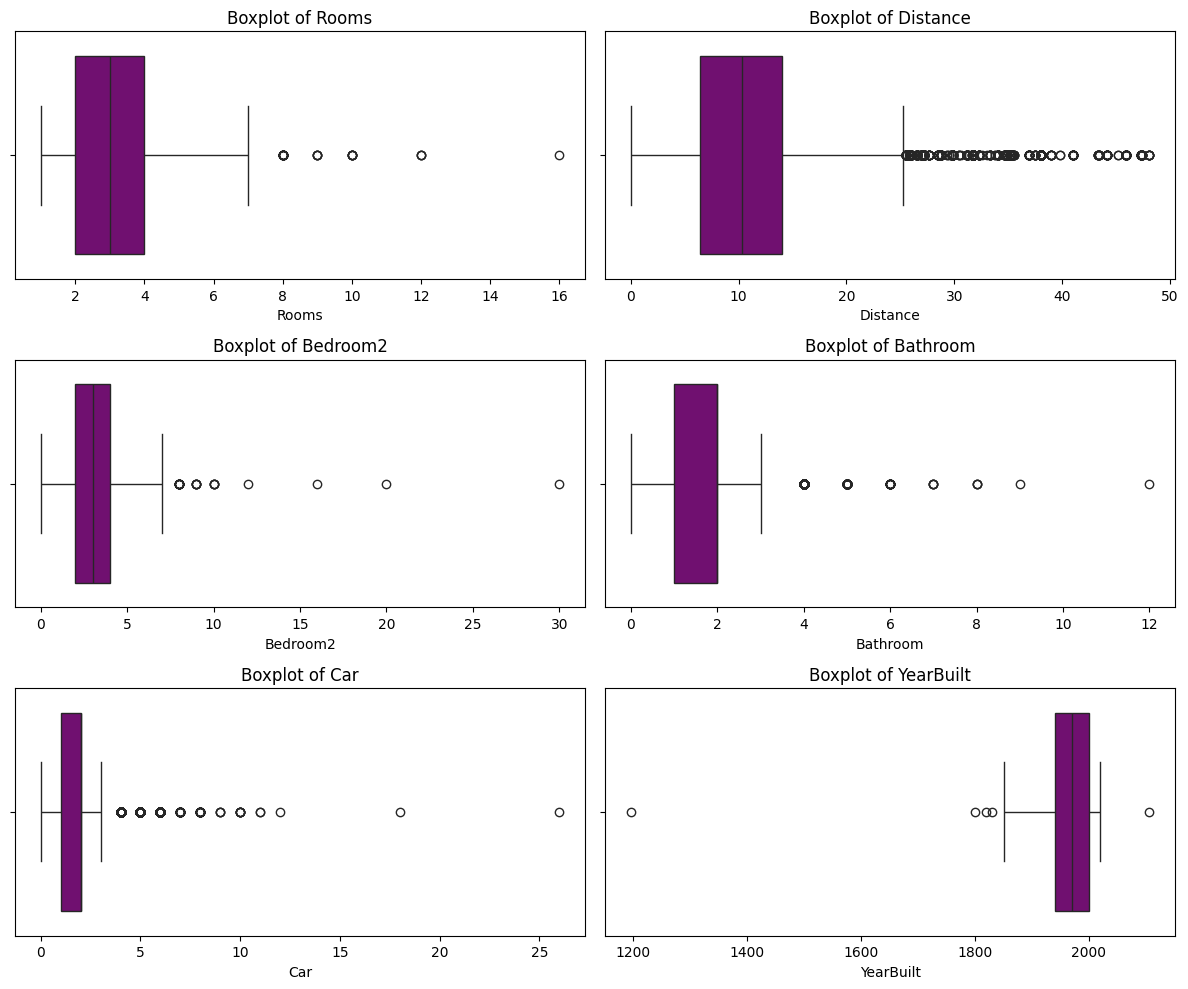

In [22]:
numerical_columns = ['Rooms', 'Distance', 'Bedroom2', 'Bathroom', 'Car', 'YearBuilt']

num_plots = len(numerical_columns)
num_rows = (num_plots + 1) // 2  
num_cols = 2

fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(12, 10)) # Creating subplots
axes = axes.flatten()

for i, column in enumerate(numerical_columns):
    sns.boxplot(x=df[column], ax=axes[i], color='purple')
    axes[i].set_title(f'Boxplot of {column}')
    axes[i].set_xlabel(column)

plt.tight_layout()
plt.show()


## Removing Outliers using Z-score Method

In [35]:
numerical_columns = df.select_dtypes(exclude="category").columns
z_score_threshold = 3

for col in numerical_columns:
    z_scores = (df[col] - df[col].mean()) / df[col].std()
    outliers = (z_scores < -z_score_threshold) | (z_scores > z_score_threshold)
    print("Outlier counts of", col, df[col][outliers].count())
    df.loc[outliers, col] = np.nan
#calculates the z-score of each value in the dataset, and then remove values that are above 3 or below -3.

Outlier counts of Rooms 0
Outlier counts of Price 230
Outlier counts of Distance 207
Outlier counts of Postcode 0
Outlier counts of Bedroom2 0
Outlier counts of Bathroom 0
Outlier counts of Car 0
Outlier counts of Landsize 247
Outlier counts of BuildingArea 152
Outlier counts of YearBuilt 0
Outlier counts of Lattitude 12
Outlier counts of Longtitude 73
Outlier counts of Propertycount 0


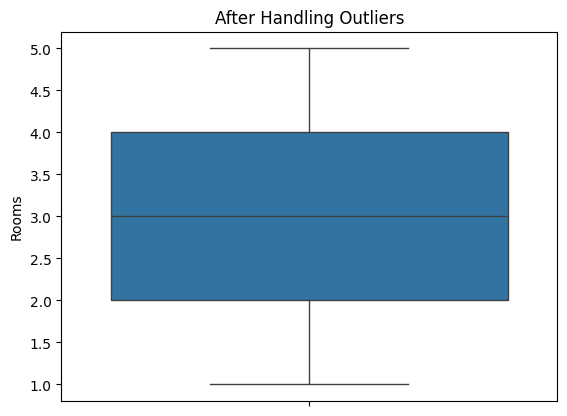

In [36]:
sns.boxplot(df['Rooms'])
plt.title('After Handling Outliers')
plt.show()

## Filling Missing Values

In [38]:
df.isna().sum()

Suburb               0
Address              0
Rooms              269
Type                 0
Price             8728
Method               0
SellerG              0
Date                 0
Distance          1187
Postcode           960
Bedroom2          8458
Bathroom          8597
Car               9081
Landsize         12371
BuildingArea     21477
YearBuilt        19318
CouncilArea          3
Lattitude         8389
Longtitude        8518
Regionname           3
Propertycount      847
dtype: int64

In [39]:
# Features that has a very weak correlation with price are removed
df.drop(columns=["Postcode", "Landsize", "BuildingArea", 
                 "Lattitude", "Longtitude", "Propertycount"], inplace=True)

In [40]:
df.isna().sum()

Suburb             0
Address            0
Rooms            269
Type               0
Price           8728
Method             0
SellerG            0
Date               0
Distance        1187
Bedroom2        8458
Bathroom        8597
Car             9081
YearBuilt      19318
CouncilArea        3
Regionname         3
dtype: int64

In [41]:
# Missing values of Bathroom and Car are filling with mode
df['Bathroom'].fillna(df['Bathroom'].mode()[0], inplace=True)
df['Car'].fillna(df['Car'].mode()[0], inplace=True)

In [42]:
# thus finding the most common values of the Bedroom2 column by grouping Rooms and Type
df[["Rooms", "Type","Bedroom2"]].groupby(["Type","Rooms"]).agg(pd.Series.mode)

Bedroom2
Type Rooms          
h    1.0         1.0
     2.0         2.0
     3.0         3.0
     4.0         4.0
     5.0         5.0
t    1.0         1.0
     2.0         2.0
     3.0         3.0
     4.0         4.0
     5.0         5.0
u    1.0         1.0
     2.0         2.0
     3.0         3.0
     4.0         4.0
     5.0         5.0

It can be used to estimate the average number of bedrooms in a house based on its type and number of rooms.

Our dataset divides the housing types into three categories:
*   h — house, cottage, villa, semi, and terrace
*   u — unit and duplex
*   t — townhouse

In [43]:
# fills in the missing values from the "Rooms" column with the values from the "Bedroom2" column..
missing=df.loc[df["Rooms"].isna()]["Rooms"].index.tolist()

for i in missing:
    df.loc[i, "Rooms"] = df._get_value(i, "Bedroom2")

In [44]:
print(df['Rooms'].info())

<class 'pandas.core.series.Series'>
Index: 34856 entries, 0 to 34856
Series name: Rooms
Non-Null Count  Dtype  
--------------  -----  
34607 non-null  float64
dtypes: float64(1)
memory usage: 1.5 MB
None


In [45]:
# Deleting the remaining missing room and drop Bedroom2
df.dropna(axis=0, subset="Rooms", inplace=True)
df.drop(columns=["Bedroom2"], inplace=True)

I choose to clean the data to focus on the important features to select the regression that best suits needs and to determine which would give the best performance

In [46]:
df.isna().sum()

Suburb             0
Address            0
Rooms              0
Type               0
Price           8608
Method             0
SellerG            0
Date               0
Distance        1175
Bathroom           0
Car                0
YearBuilt      19192
CouncilArea        3
Regionname         3
dtype: int64

In [47]:
# Check missing Regionname rows.
df.loc[df["Regionname"].isna()]

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Bathroom,Car,YearBuilt,CouncilArea,Regionname
18523,Footscray,2/16 Stafford St,2.0,u,710000.0,S,Jas,15/07/2017,5.1,1.0,2.0,NaN,NaN,NaN
26888,Camberwell,2/3 Kingsley St,2.0,h,825000.0,VB,Jellis,11/11/2017,7.7,1.0,2.0,NaN,NaN,NaN
29483,Fawkner Lot,1/3 Brian St,3.0,h,616000.0,SP,Brad,6/01/2018,NaN,1.0,2.0,NaN,NaN,NaN


In [48]:
df.loc[18523 ,"Regionname"] = df[df["Suburb"] == "Footscray"]["Regionname"].mode()[0]
df.loc[26888 ,"Regionname"] = df[df["Suburb"] == "Camberwell"]["Regionname"].mode()[0]
df.loc[29483 ,"Regionname"] = df[df["Address"].str.contains("Brian St")]["Regionname"].mode()[0]

In [49]:
df.loc[18523 ,"CouncilArea"] = df[df["Suburb"] == "Footscray"]["CouncilArea"].mode()[0]
df.loc[26888 ,"CouncilArea"] = df[df["Suburb"] == "Camberwell"]["CouncilArea"].mode()[0]
df.loc[29483 ,"CouncilArea"] = df[df["Address"].str.contains("Brian St")]["CouncilArea"].mode()[0]

In [50]:
# Check remaining missing values
df.isna().sum()

Suburb             0
Address            0
Rooms              0
Type               0
Price           8608
Method             0
SellerG            0
Date               0
Distance        1175
Bathroom           0
Car                0
YearBuilt      19192
CouncilArea        0
Regionname         0
dtype: int64

In [51]:
# Dropping empty pprices
df.dropna(axis=0, subset="Price", inplace=True)

In [52]:
df.isna().sum()

Suburb             0
Address            0
Rooms              0
Type               0
Price              0
Method             0
SellerG            0
Date               0
Distance         950
Bathroom           0
Car                0
YearBuilt      14573
CouncilArea        0
Regionname         0
dtype: int64

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25999 entries, 1 to 34856
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   Suburb       25999 non-null  category
 1   Address      25999 non-null  category
 2   Rooms        25999 non-null  float64 
 3   Type         25999 non-null  category
 4   Price        25999 non-null  float64 
 5   Method       25999 non-null  category
 6   SellerG      25999 non-null  category
 7   Date         25999 non-null  category
 8   Distance     25049 non-null  float64 
 9   Bathroom     25999 non-null  float64 
 10  Car          25999 non-null  float64 
 11  YearBuilt    11426 non-null  float64 
 12  CouncilArea  25999 non-null  category
 13  Regionname   25999 non-null  category
dtypes: category(8), float64(6)
memory usage: 3.0 MB


## Data Visualization

<Axes: xlabel='Price', ylabel='Count'>

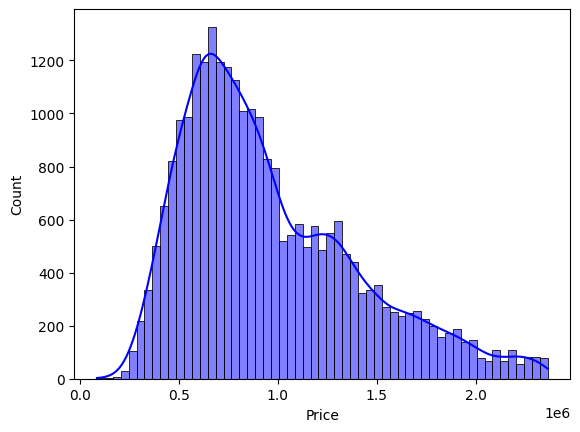

In [54]:
#price distribution
sns.histplot(data=df["Price"], kde=True, color="blue" )

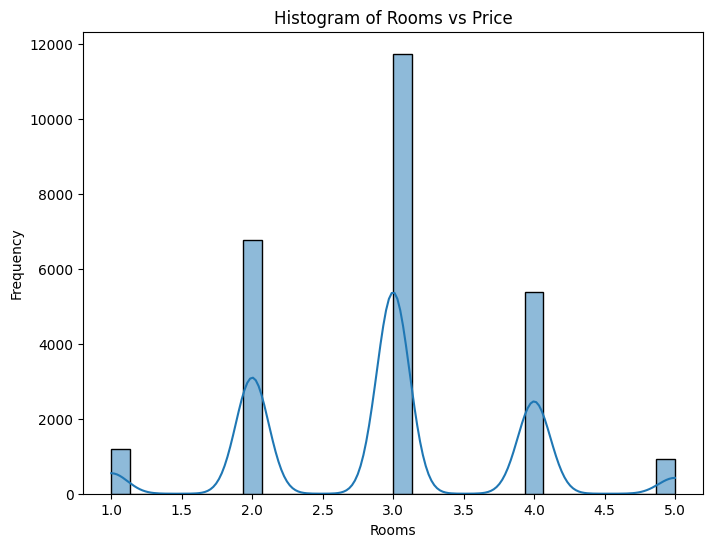

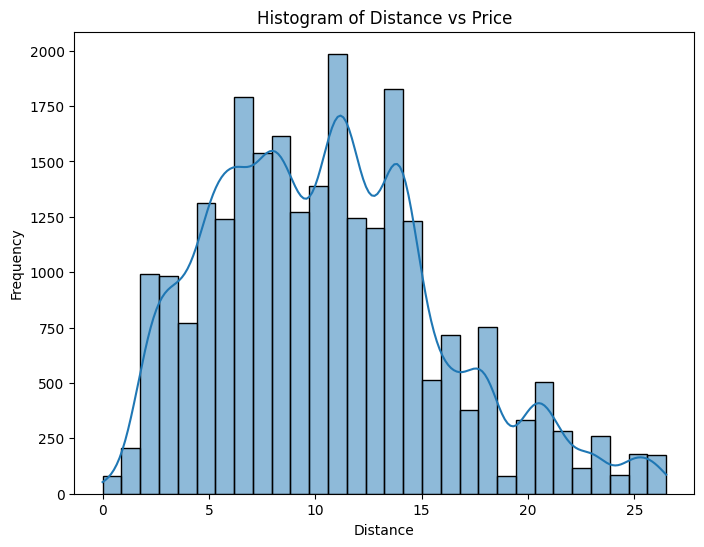

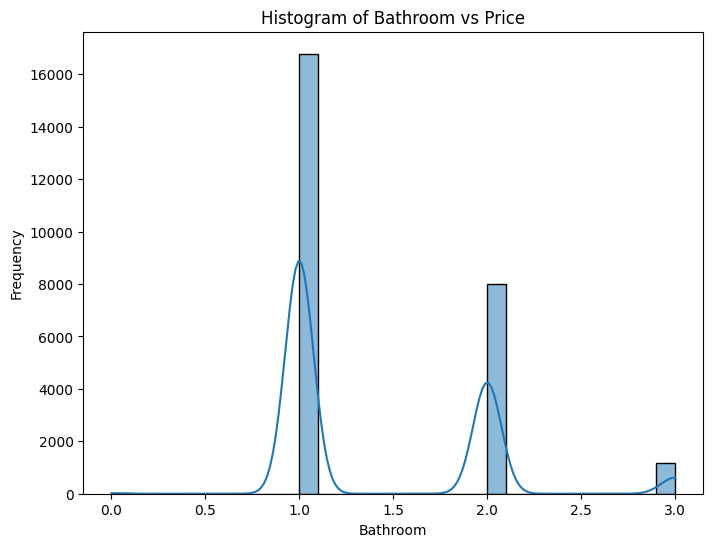

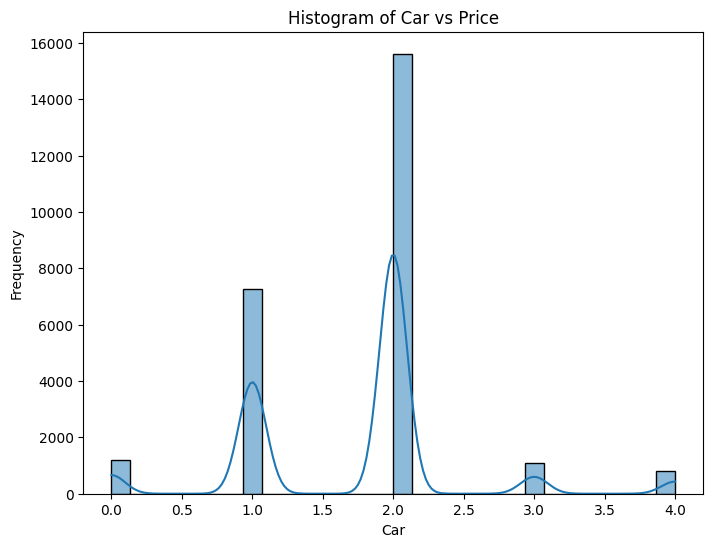

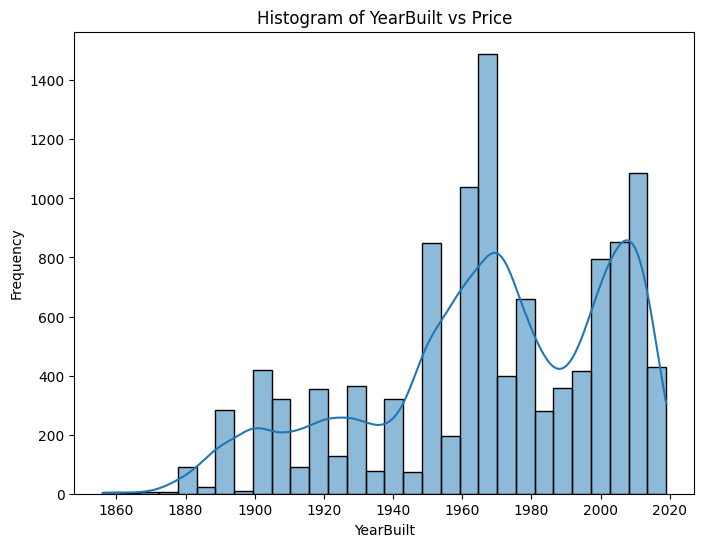

In [55]:
#The relationship between all numerical variables and the Price variable
numerical_columns = ['Rooms', 'Distance', 'Bathroom', 'Car', 'YearBuilt']

# Create histograms for each numerical column
for column in numerical_columns:
    plt.figure(figsize=(8, 6))
    sns.histplot(data=df, x=column, bins=30, kde=True)
    plt.title(f'Histogram of {column} vs Price')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

<Axes: >

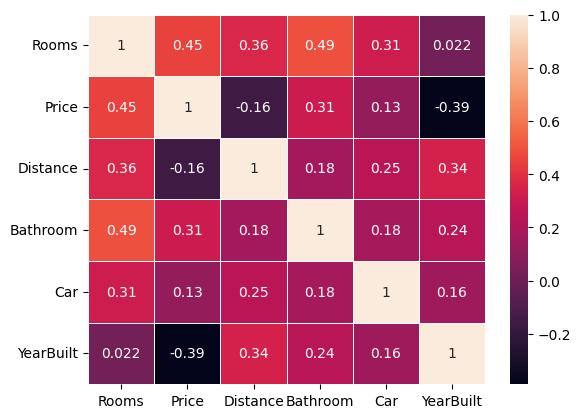

In [56]:
# Correlation Matrix
sns.heatmap(df.corr(numeric_only=True).T, annot=True, linewidths=.5)

In [57]:
# One-hot encode categorical variables
df = pd.get_dummies(df, columns=['Type', 'Suburb'], drop_first=True)

In this dataset, One-Hot Encoding is used to transform categorical variables, such as "Type" and "Suburb" into binary variables, it avoids implying any ordinal relationship between categories.

## Splitting dataset into train and test sets

In [58]:
X = df.drop(['Price'], axis = 1)
y = df['Price']

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

## Scaling dataset

In [60]:
# Identify numerical columns after splitting
numerical_columns = X_train.select_dtypes(include=['float64']).columns

# Dropping NaN values from X_train and y_train
X_train = X_train.dropna(subset=numerical_columns)
y_train = y_train.loc[X_train.index]

# Dropping NaN values from X_test and y_test
X_test = X_test.dropna(subset=numerical_columns)
y_test = y_test.loc[X_test.index]

# Separating numerical columns for scaling
X_train_scaled = X_train[numerical_columns]
X_test_scaled = X_test[numerical_columns]

# Scaling numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_scaled)
X_test_scaled = scaler.transform(X_test_scaled)

we can see that the numerical features have different ranges of values, and the scale of the values varies significantly.

# Model Selection

In [61]:
# Simple Linear Regression
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)
y_pred_lr = lr.predict(X_test_scaled)
mse_lr = mean_squared_error(y_test, y_pred_lr)
print("Mean Squared Error (Simple Linear Regression):", mse_lr)

Mean Squared Error (Simple Linear Regression): 106792877980.60469


In [65]:
# Calculating R-squared
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred_lr)
print("R-squared (Simple Linear Regression):", r2)

R-squared (Simple Linear Regression): 0.5142977783236179


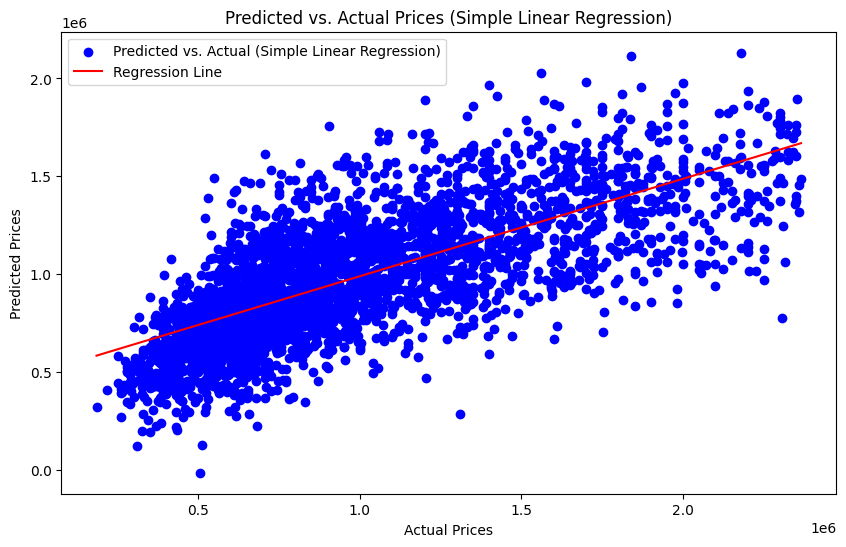

In [66]:
# regression line (line of best fit)
slope, intercept = np.polyfit(y_test, y_pred_lr, 1)
x_values = np.linspace(min(y_test), max(y_test), 100)
y_values = slope * x_values + intercept

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_lr, color='blue', label='Predicted vs. Actual (Simple Linear Regression)')
plt.plot(x_values, y_values, color='red', label='Regression Line')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Predicted vs. Actual Prices (Simple Linear Regression)')
plt.legend()
plt.show()


With these graphics, i can ensure the relationship strengths between variables and model performance

In [89]:
# Polynomial Regression
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)
lr_poly = LinearRegression()
lr_poly.fit(X_train_poly, y_train)
y_pred_poly = lr_poly.predict(X_test_poly)
mse_poly = mean_squared_error(y_test, y_pred_poly)
print("Mean Squared Error (Polynomial Regression):", mse_poly)

Mean Squared Error (Polynomial Regression): 100074403364.13031


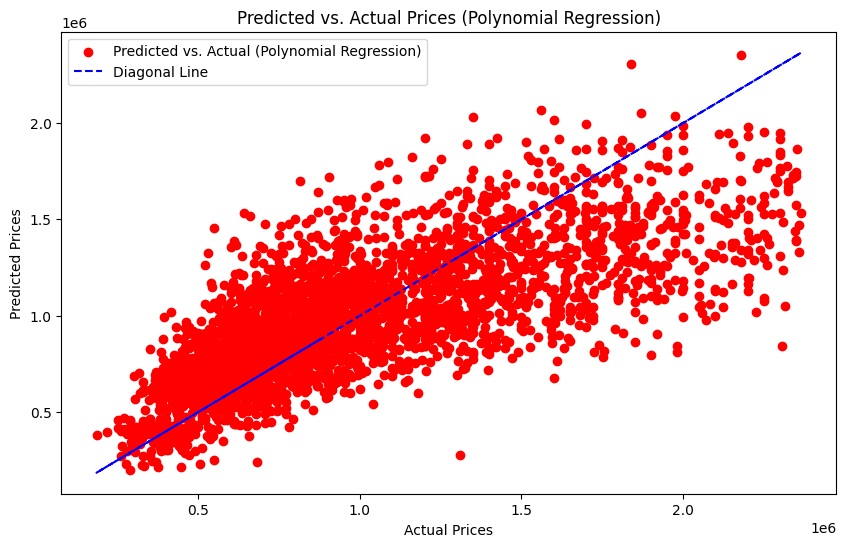

In [90]:
# Plotting predicted vs. actual prices for polynomial regression
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_poly, color='red', label='Predicted vs. Actual (Polynomial Regression)')
plt.plot(y_test, y_test, color='blue', linestyle='--', label='Diagonal Line')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Predicted vs. Actual Prices (Polynomial Regression)')
plt.legend()
plt.show()


In [70]:
# Regularization Regression - Ridge
ridge = Ridge(alpha=0.1)
ridge.fit(X_train_scaled, y_train)
y_pred_ridge = ridge.predict(X_test_scaled)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
print("Mean Squared Error (Ridge Regression):", mse_ridge)

Mean Squared Error (Ridge Regression): 106792966131.22694


In [72]:
r2 = r2_score(y_test, y_pred_ridge)
print("R-squared:", r2)

R-squared: 0.5142973774078089


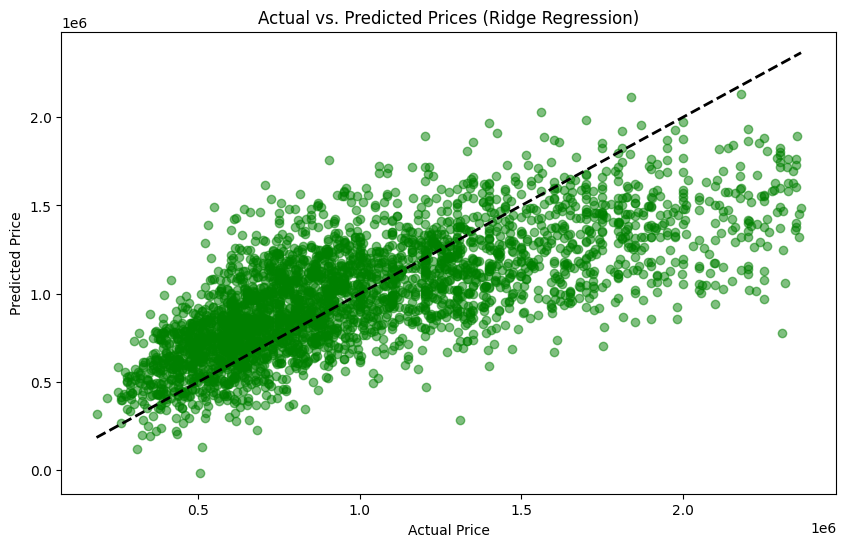

In [73]:
# Plotting predicted vs. actual values for Ridge Regression
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_ridge, color='green', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)  # Diagonal line
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs. Predicted Prices (Ridge Regression)')
plt.show()

In [74]:
# Regularization Regression - Lasso
lasso = Lasso(alpha=0.1)
lasso.fit(X_train_scaled, y_train)
y_pred_lasso = lasso.predict(X_test_scaled)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
print("Mean Squared Error (Lasso Regression):", mse_lasso)

Mean Squared Error (Lasso Regression): 106792883145.6446


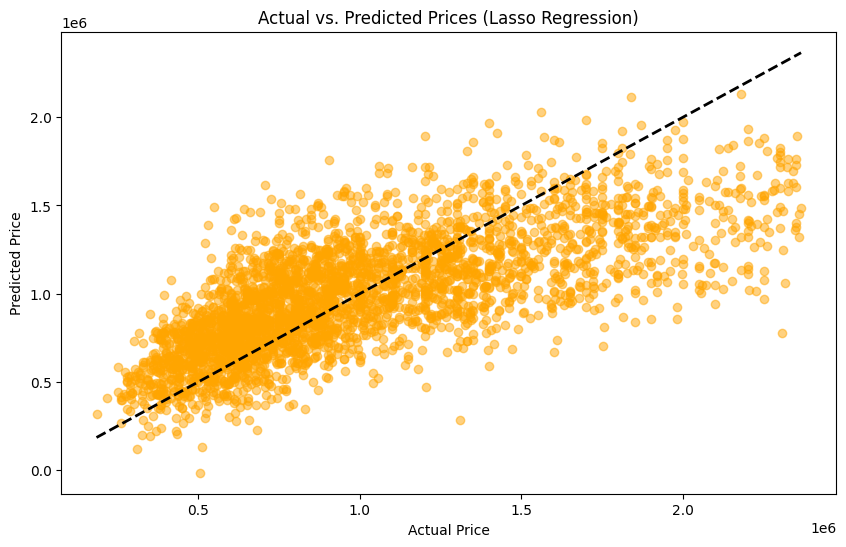

In [75]:
# Scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_lasso, color='orange', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)  # Diagonal line
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs. Predicted Prices (Lasso Regression)')
plt.show()

In [76]:
lasso = Lasso(alpha=0.1, max_iter=10000)  # Increased max_iter
lasso.fit(X_train_scaled, y_train)
y_pred_lasso = lasso.predict(X_test_scaled)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
print("Mean Squared Error (Lasso Regression):", mse_lasso)

Mean Squared Error (Lasso Regression): 106792883145.6446


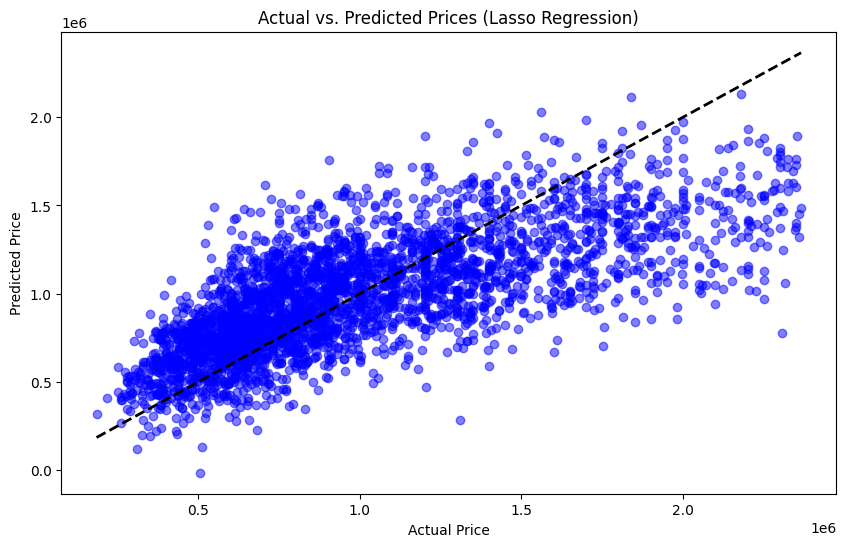

In [77]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_lasso, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)  # Diagonal line
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs. Predicted Prices (Lasso Regression)')
plt.show()

In [78]:
from sklearn.tree import DecisionTreeRegressor

decision_tree = DecisionTreeRegressor()
decision_tree.fit(X_train_scaled, y_train)
y_pred_decision_tree = decision_tree.predict(X_test_scaled)

mse_decision_tree = mean_squared_error(y_test, y_pred_decision_tree)
print("Mean Squared Error (Decision Tree):", mse_decision_tree)

Mean Squared Error (Decision Tree): 127273607952.6734


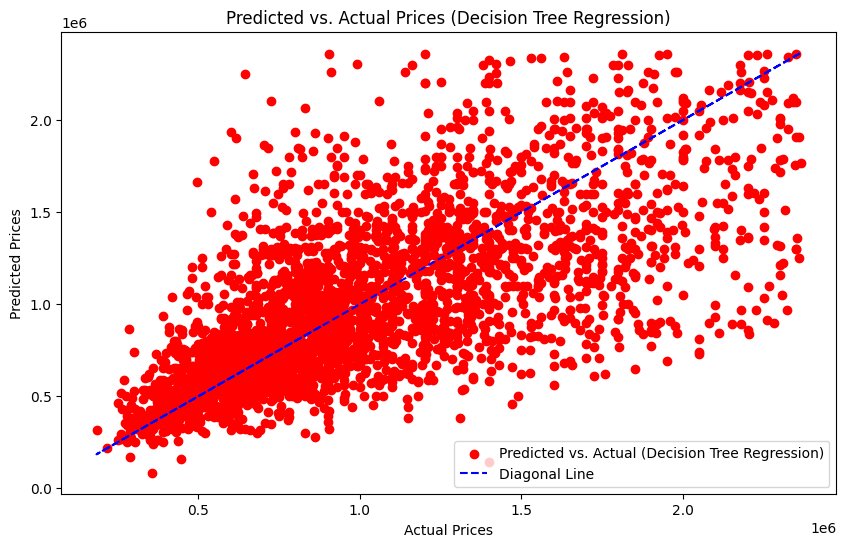

In [91]:
# Scatter plot for Decision Tree Regression
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_decision_tree, color='red', label='Predicted vs. Actual (Decision Tree Regression)')
plt.plot(y_test, y_test, color='blue', linestyle='--', label='Diagonal Line')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Predicted vs. Actual Prices (Decision Tree Regression)')
plt.legend()
plt.show()

In [82]:
from sklearn.ensemble import RandomForestRegressor

random_forest = RandomForestRegressor(n_estimators=100, random_state=42)
random_forest.fit(X_train_scaled, y_train)
y_pred_random_forest = random_forest.predict(X_test_scaled)

mse_random_forest = mean_squared_error(y_test, y_pred_random_forest)
print("Mean Squared Error (Random Forest):", mse_random_forest)

Mean Squared Error (Random Forest): 86199964796.9611


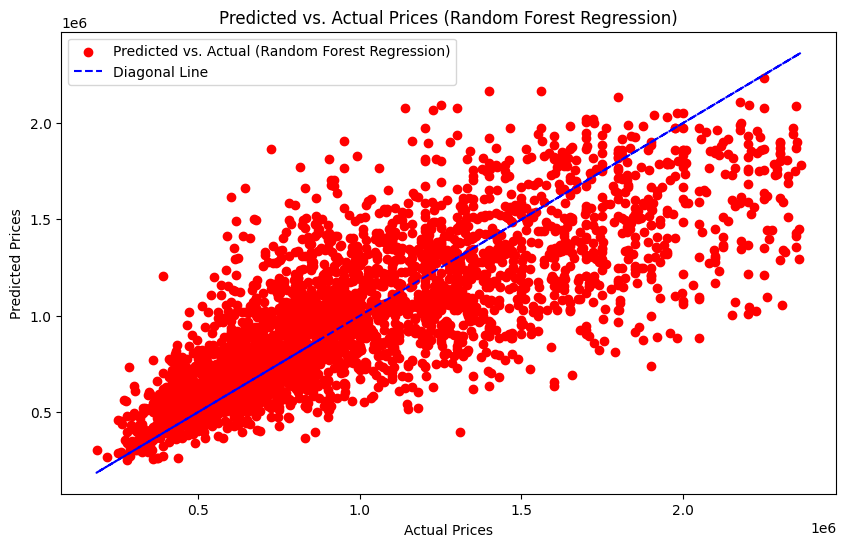

In [92]:
# Scatter plot for Random Forest Regression
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_random_forest, color='red', label='Predicted vs. Actual (Random Forest Regression)')
plt.plot(y_test, y_test, color='blue', linestyle='--', label='Diagonal Line')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Predicted vs. Actual Prices (Random Forest Regression)')
plt.legend()
plt.show()

# Model Evaluation

In [79]:
from sklearn.model_selection import cross_val_score
def best_model(models_dict, X, y, cv=10, scoring='neg_mean_squared_error'):
    model_names = []
    rmse_scores = []
    
    for model_name, model in models_dict.items():
        cv_scores = cross_val_score(model, X, y, cv=cv, scoring=scoring)
        rmse_score = np.sqrt(np.mean(np.abs(cv_scores)))
        model_names.append(model_name)
        rmse_scores.append(rmse_score)
    
    results = pd.DataFrame({'Model': model_names, 'RMSE Score': rmse_scores})
    return results

best_model method selects the best model among a models using cross-validation and returns it with names and RMSE scores. Number of cross-validation folds is 10. Scoring metric for cross-validation is neg_mean_squared_error as default.

In [83]:
models = {
    'Lasso Regression': lasso,
    'Ridge Regression': ridge,
    'Polynomial Regression': lr_poly,
    'Decision Tree': decision_tree,
    'Random Forest': random_forest
}
results = best_model(models, X_train_scaled, y_train) 

print("Model Comparison Results:")
print(results)


Model Comparison Results:
                   Model     RMSE Score
0       Lasso Regression  319546.512309
1       Ridge Regression  319546.508538
2  Polynomial Regression  319546.512253
3          Decision Tree  361294.404650
4          Random Forest  288697.514057


A lower the Root Mean Squared Error (RMSE) indicates that the model's predictions are closer to the actual values, Random Forest is the best one. I confirm that because of the data consistency, it leads to nearly similar performance across different models since the dataset does not contain strong patterns that allow the models to significantly outperform each other, which are the possible flaws in the models as explained above.

Possible flaws typically indicates that the polynomial features added to the model don't contribute such significantly differences to the model's performance and it overfits the data with higher degrees of polynomials. 